<a href="https://colab.research.google.com/github/tiffanyndanu/Mchezopesa/blob/main/Mchezopesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. DEFINING THE QUESTION.**


### **a)The Data Analytic Question**

>Based on who's home and who's away, and whether or not the game is friendly, what will be the predicted results of a game between team 1 and team 2?



### **b)Metric for Success**

> Approach 1: Polynomial approach
Be able to Predict how many goals the home team scores. Be able to Predict how many goals the away team scores.

> Approach 2: Logistic approach
Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw.

> For our analysis to be considered successful, we must be able to:

1.Perform explorative data analysis.

2.Create a prediction model with high accuracy.

3.Predict how many goals the home team and the away team scores.

4.Predict whether from the home team's perspective, the game is a Win, Lose or Draw.

















### **c)Understanding the context** 

FIFA produced the inaugural ranking of its men's member associations in December 1992 to offer a framework for comparing the relative strengths of these teams.

 Historical rankings records, such as those found on FIFA.com, reflect the method of calculation in use at the time, as the new technique has not been applied retroactively to rankings prior to July 2006. Since the rankings began, FIFA's membership has grown from 167 to 211, with 210 members currently included in the rankings.

 FIFA uses the rankings to rate the progress and existing capabilities of its member nations' national football teams, claiming that they provide "a valid metric for comparing national A-teams."They are used to seed tournaments as part of the calculation or as the complete grounds.

 The rankings are also used to choose the winners of two annual awards given to national teams based on their rankings performance.

One of the factors for player work permits used by the (English) Football Association is the average of the previous 24 months' rankings.

###**d)Experimental Design**




> These are the steps to be followed during the analysis:


1.Defining the Question

2.Data preparation

3.Data Cleaning

4.Merging the Dataframes

5.Performing EDA

6.Prediction Models

7.Checking accuracy for our models

8.Challenging the solution and conclusion



###**e)Data Relevance**

The data provided is relevant since it contains all details required for analysis and building a model for prediction.

# **2. DATA PREPARATION**

In [1]:
# Importing the necessary libraries
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns
#Is a function in Sklearn for splitting data into two subsets: training set and testing set 
from sklearn.model_selection import train_test_split
#This is used to import linearregression model
from sklearn.linear_model import LinearRegression
#This is used to import the LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [27]:
# Loading the ranking dataset and previewing it

Ranking = pd.read_csv('/content/fifa_ranking.csv')
Ranking


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
# Loading the results dataset and previewing it

Results = pd.read_csv('/content/results.csv')
Results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [4]:
# Checking the shape of both datsets

print(Ranking.shape)
print(Results.shape)

#The ranking datset has 57,793 rows and 16 columns
#The results dataset has 40,839 rows and 9 columns

(57793, 16)
(40839, 9)


In [5]:
# Getting information about the Ranking dataset

Ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [6]:
# Getting information about the Results dataset

Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [7]:
# Summary statistics for the Ranking dataset

Ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [8]:
# Summary statistics for the Results dataset

Results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# **DATA CLEANING**

In [9]:
# Checking for missing values in the ranking dataset

Ranking.isnull().sum()



rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [10]:
# Checking for missing values in the results dataset

Results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:
# Checking for duplicates in the ranking dataset

Ranking.duplicated().sum()

37

In [12]:
# Dropping duplicates in the Ranking dataset

Ranking.drop_duplicates(inplace=True)
Ranking.duplicated().sum()

0

In [13]:
# Checking for duplicates in the results dataset

Results.duplicated().sum()

0

In [28]:
# Dropping unnecessary columns in the Ranking dataset.
# Dropping anythung unrelated to rank
Ranking.drop(['country_abrv','total_points','previous_points','cur_year_avg',
           'cur_year_avg_weighted', 'last_year_avg','last_year_avg_weighted','two_year_ago_avg',
           'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'], axis = 1, inplace = True)
Ranking.head()

,rank,country_full,rank_change,confederation,rank_date
0,1,Germany,0,UEFA,1993-08-08
1,2,Italy,0,UEFA,1993-08-08
2,3,Switzerland,9,UEFA,1993-08-08
3,4,Sweden,0,UEFA,1993-08-08
4,5,Argentina,5,CONMEBOL,1993-08-08


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


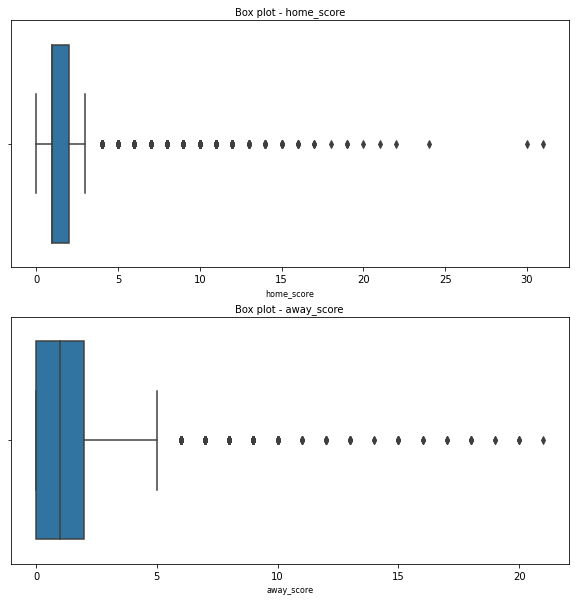

In [15]:
# Checking for outliers in the columns with numerical data

col_names = ['home_score', 'away_score']

fig, ax = plt.subplots(len(col_names), figsize=(10,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(Results[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [34]:
# Changing the date column to pandas datetime 
Ranking.rank_date = pd.to_datetime(Ranking.rank_date)
Ranking.dtypes

rank                      int64
country_full             object
rank_change               int64
confederation            object
rank_date        datetime64[ns]
dtype: object

In [24]:
# Changing date column in Results to pandas datetime 

Results.date = pd.to_datetime(Results.date)
Results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

# **MERGING**

In [37]:
#Checking unique years in the ranking dataset
Ranking['year'] = Ranking['rank_date'].dt.year
Ranking.year.unique()

# the range is from 1993 to 2018

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [38]:
# Checking the unique values in the date of our results dataset
Results['year'] = Results['date'].dt.year
Results.year.unique()

# the range is from 1872 to 2019

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [39]:
# Since the ranking dataset begins in 1993 and ends in 2018
# We will filter our results dataset to only feature this timeframe
result1 = Results[(Results["date"] > '1993-01-01') &  (Results["date"] < '2018-06-07')]
result1.shape

(22458, 10)

In [40]:
# Changing our date columns to reflect the year and month only

Ranking['year'] = Ranking.rank_date.dt.year
result1['year'] = result1.date.dt.year

Ranking['month'] = Ranking.rank_date.dt.month
result1['month'] = result1.date.dt.month

result1.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

## **Home Rank**

In [41]:
# Renaming the country column
Ranking.columns
Ranking.rename(columns={'country_full':'home_team'}, inplace=True)

In [42]:
# Joining our dataframes on the three columns they have in common to get the home team rank
Home = pd.merge(Ranking, result1, how='right', on=['home_team','year','month'])
Home.head()

,rank,home_team,rank_change,confederation,rank_date,year,month,date,away_team,home_score,away_score,tournament,city,country,neutral
0,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-02,Burkina Faso,1,1,Friendly,Libreville,Gabon,False
1,NaN,Kuwait,NaN,NaN,NaT,1993,1,1993-01-02,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False
2,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-03,Mali,1,0,Friendly,Libreville,Gabon,True
3,NaN,Gabon,NaN,NaN,NaT,1993,1,1993-01-03,Ghana,2,3,Friendly,Libreville,Gabon,False
4,NaN,Uganda,NaN,NaN,NaT,1993,1,1993-01-08,Tanzania,3,1,Friendly,Kampala,Uganda,False


In [43]:
# Checking for duplicates 

Home.duplicated().sum()

16

In [45]:
#Dropping the duplicates

Home.drop_duplicates(inplace=True)
Home.duplicated().sum()

0

In [44]:
# Checking for any null values in our merged dataframe
Home.isnull().sum()

# Dropping these null values
Home.dropna(inplace=True)
Home.isnull().sum()

rank             0
home_team        0
rank_change      0
confederation    0
rank_date        0
year             0
month            0
date             0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
dtype: int64

In [52]:
Home.shape

(18522, 15)

## **Away Rank**

In [46]:
# our country column
Ranking.columns
Ranking.rename(columns={'home_team':'away_team'}, inplace=True)

In [47]:
# Joining our dataframes on the three columns they have in common

Away = pd.merge(Ranking, result1, how='right', on=['away_team','year','month'])
Away.head()

,rank,away_team,rank_change,confederation,rank_date,year,month,date,home_team,home_score,away_score,tournament,city,country,neutral
0,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-02,Gabon,1,1,Friendly,Libreville,Gabon,False
1,NaN,Lebanon,NaN,NaN,NaT,1993,1,1993-01-02,Kuwait,2,0,Friendly,Kuwait City,Kuwait,False
2,NaN,Mali,NaN,NaN,NaT,1993,1,1993-01-03,Burkina Faso,1,0,Friendly,Libreville,Gabon,True
3,NaN,Ghana,NaN,NaN,NaT,1993,1,1993-01-03,Gabon,2,3,Friendly,Libreville,Gabon,False
4,NaN,Tanzania,NaN,NaN,NaT,1993,1,1993-01-08,Uganda,3,1,Friendly,Kampala,Uganda,False


In [48]:
# Renaming the rank column

Away.rename(columns = {'rank': 'away_rank'}, inplace =True)
Away.head()

,away_rank,away_team,rank_change,confederation,rank_date,year,month,date,home_team,home_score,away_score,tournament,city,country,neutral
0,NaN,Burkina Faso,NaN,NaN,NaT,1993,1,1993-01-02,Gabon,1,1,Friendly,Libreville,Gabon,False
1,NaN,Lebanon,NaN,NaN,NaT,1993,1,1993-01-02,Kuwait,2,0,Friendly,Kuwait City,Kuwait,False
2,NaN,Mali,NaN,NaN,NaT,1993,1,1993-01-03,Burkina Faso,1,0,Friendly,Libreville,Gabon,True
3,NaN,Ghana,NaN,NaN,NaT,1993,1,1993-01-03,Gabon,2,3,Friendly,Libreville,Gabon,False
4,NaN,Tanzania,NaN,NaN,NaT,1993,1,1993-01-08,Uganda,3,1,Friendly,Kampala,Uganda,False


In [49]:
# Checking for any null values in our merged dataframe
Away.isnull().sum()

# Let us drop these null values
Away.dropna(inplace=True)
Away.isnull().sum()

away_rank        0
away_team        0
rank_change      0
confederation    0
rank_date        0
year             0
month            0
date             0
home_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
dtype: int64

In [53]:
Away.shape

(18453, 15)

# **Final Merge**

In [55]:
# merging the final dataframe that will be used for analysis
Final = pd.merge(Home, Away, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])
Final.head()

,rank,home_team_x,rank_change_x,confederation_x,rank_date_x,year,month,date_x,away_team,home_score_x,...,confederation_y,rank_date_y,date_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
0,19.0,Colombia,16.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Paraguay,0,...,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
1,19.0,Colombia,16.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Paraguay,0,...,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
2,5.0,Argentina,5.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Paraguay,0,...,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False
3,5.0,Argentina,5.0,CONMEBOL,1993-08-08,1993,8,1993-08-29,Paraguay,0,...,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,70.0,Peru,8.0,CONMEBOL,1993-08-08,1993,8,1993-08-01,Argentina,0,...,CONMEBOL,1993-08-08,1993-08-01,Peru,0,1,FIFA World Cup qualification,Lima,Peru,False


In [56]:
# Checking for any missing values
Final.isnull().sum()

# we have no null values

rank               0
home_team_x        0
rank_change_x      0
confederation_x    0
rank_date_x        0
year               0
month              0
date_x             0
away_team          0
home_score_x       0
away_score_x       0
tournament_x       0
city_x             0
country_x          0
neutral_x          0
away_rank          0
rank_change_y      0
confederation_y    0
rank_date_y        0
date_y             0
home_team_y        0
home_score_y       0
away_score_y       0
tournament_y       0
city_y             0
country_y          0
neutral_y          0
dtype: int64

In [57]:
# Dropping unnecessary columns

Final.drop(columns= ['date_x', 'country_x','rank_change_y','confederation_y','rank_date_y', 
'date_y','home_team_y','home_score_y','away_score_y','tournament_y','country_y',
'neutral_y', 'rank_date_x'], inplace=True)
Final.head()

,rank,home_team_x,rank_change_x,confederation_x,year,month,away_team,home_score_x,away_score_x,tournament_x,city_x,neutral_x,away_rank,city_y
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Barranquilla
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Buenos Aires
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Barranquilla
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Buenos Aires
4,70.0,Peru,8.0,CONMEBOL,1993,8,Argentina,0,1,FIFA World Cup qualification,Lima,False,5.0,Lima


In [60]:
# Renaming our columns
Final.rename(columns={'home_team_x':'home_team',
                   'rank_change_x':'rank_change',
                   'confederation_x':'confederation',
                   'home_score_x':'home_score',
                   'away_score_x':'away_score',
                   'tournament_x':'tournament',
                   'neutral_x':'neutral_x'},
                   inplace=True)
Final.head()

,rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,city_x,neutral_x,away_rank,city_y
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Barranquilla
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Buenos Aires
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Barranquilla
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Buenos Aires
4,70.0,Peru,8.0,CONMEBOL,1993,8,Argentina,0,1,FIFA World Cup qualification,Lima,False,5.0,Lima


In [66]:
# Creating a column to hold the win lose or draw result
Final['goal_diff'] = Final.home_score - Final.away_score
Final['result'] = Final.home_score - Final.away_score

Final.head()

,rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,city_x,neutral_x,away_rank,city_y,goal_diff,result
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Barranquilla,0,0
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Buenos Aires,0,0
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Barranquilla,0,0
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Buenos Aires,0,0
4,70.0,Peru,8.0,CONMEBOL,1993,8,Argentina,0,1,FIFA World Cup qualification,Lima,False,5.0,Lima,-1,-1


In [67]:
# DEfining a funtion that will determine if a match is lose or win or draw
# from the perspective of our home team
a = Final.home_score - Final.away_score

def match_result(a):
  if a > 0:
    return 'WIN'
  elif a < 0:
    return 'LOSS'
  else:
    return 'DRAW'

In [68]:
# creating a new column to give the match outcome
Final['result']= Final.result.apply(lambda a: match_result(a))

Final.head()

,rank,home_team,rank_change,confederation,year,month,away_team,home_score,away_score,tournament,city_x,neutral_x,away_rank,city_y,goal_diff,result
0,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Barranquilla,0,DRAW
1,19.0,Colombia,16.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,67.0,Buenos Aires,0,DRAW
2,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Barranquilla,0,DRAW
3,5.0,Argentina,5.0,CONMEBOL,1993,8,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,False,67.0,Buenos Aires,0,DRAW
4,70.0,Peru,8.0,CONMEBOL,1993,8,Argentina,0,1,FIFA World Cup qualification,Lima,False,5.0,Lima,-1,LOSS


In [69]:
# Creating a column to hold the tournament type

def type_tourn(i):
  if i == 'FIFA World Cup':
    return 'World Cup'
  elif i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

In [70]:
Final['tournament_type'] = Final.tournament.apply(lambda x: type_tourn(x))

Final.tournament_type.unique()

array(['Other', 'Friendly', 'World Cup'], dtype=object)

## **UNIVARIATE ANALYSIS**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

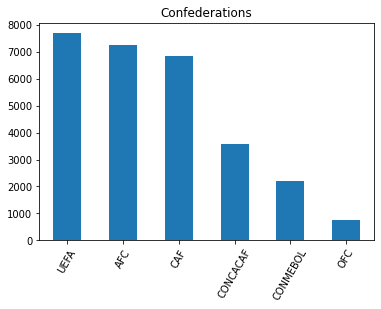

In [72]:
# Bar graph showing confederations

Final.confederation.value_counts().head(10).plot.bar()
plt.title('Confederations')
degrees = 60
plt.xticks(rotation=degrees)
# UEFA Confederations are the highest occuring in our dataframe



Text(0.5, 1.0, 'A Pie chart of Results of the Match')

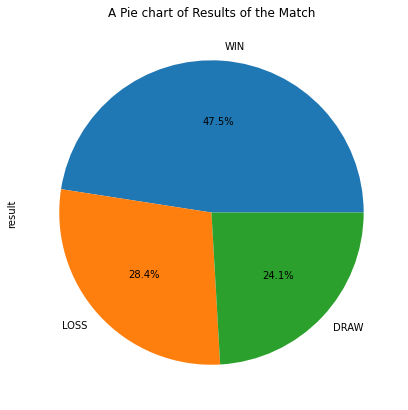

In [73]:
# Pie chart visualizing the wins, loses and draws

Final.result.value_counts().plot(kind= 'pie', figsize=[7,7], autopct = '%1.1f%%')
plt.title('A Pie chart of Results of the Match') 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

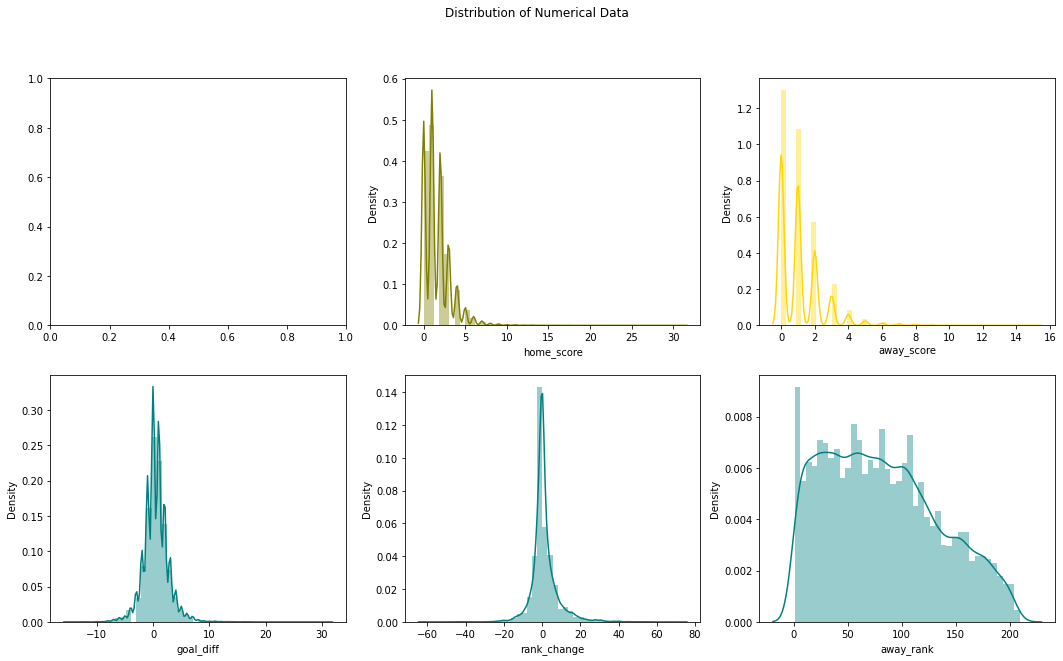

In [83]:
# Checking the distributions of our data
# we will use 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Distribution of Numerical Data')


sns.distplot( Final["home_score"] , color="olive", ax=axes[0, 1])
sns.distplot( Final["away_score"] , color="gold", ax=axes[0, 2])
sns.distplot( Final["goal_diff"] , color="teal", ax=axes[1, 0])
sns.distplot( Final["rank_change"] , color="teal", ax=axes[1, 1])
sns.distplot( Final["away_rank"] , color="teal", ax=axes[1, 2])
# our data is normally distributed

# **BIVARIATE ANALYSIS**

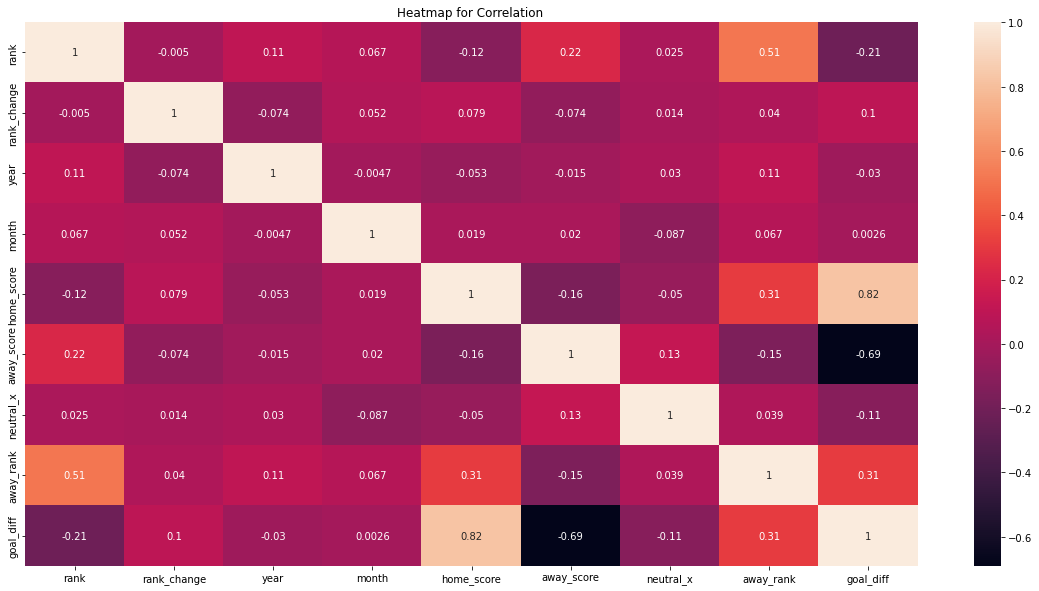

In [77]:
# Calculating the pearson coefficient correlation

correlation = Final.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

# **PREDICTIVE ANALYSIS**

In [78]:
# Creating a copy
Final2 = Final.copy()

# Data for label encoding

Final2['neutral_x'] = Final2['neutral_x'].astype('category')
Final2['tournament_type'] = Final2['tournament_type'].astype('category')
Final2['result'] = Final2['result'].astype('category')

In [79]:
# Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

Final2['neutral_x'] = labelencoder.fit_transform(Final2['neutral_x'])
Final2['tournament_type'] = labelencoder.fit_transform(Final2['tournament_type'])
Final2['result'] = labelencoder.fit_transform(Final2['result'])

# **Polynomial Regression**

In [86]:
Final2.describe()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

#Declaring our Independent and Deendent variables 
X = Final[[ 'away_rank','tournament_type']]
y = Final['home_score']

In [87]:
# Displaying the correlations between the variables
# we exclude the home score since it is our target variable
X.corr()

,away_rank
away_rank,1.0


In [88]:
# Checking for Multicollinearity
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

TypeError: ignored

In [89]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [90]:
# # Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)